<a href="https://colab.research.google.com/github/Letch49/ML_vvsu_2024/blob/master/lab5/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

##Выбор и исключение переменных

Загрузите набор данных из файла ```Regressions datasets``` в соответствии с вашим вариантом (о смене датасета - индивидуально)

In [ ]:
pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! kaggle datasets download arnabchaki/data-science-salaries-2023

  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 38.2MB/s]


In [ ]:
! unzip data-science-salaries-2023.zip

Archive:  data-science-salaries-2023.zip
  inflating: ds_salaries.csv         


In [ ]:
#чтение файла
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


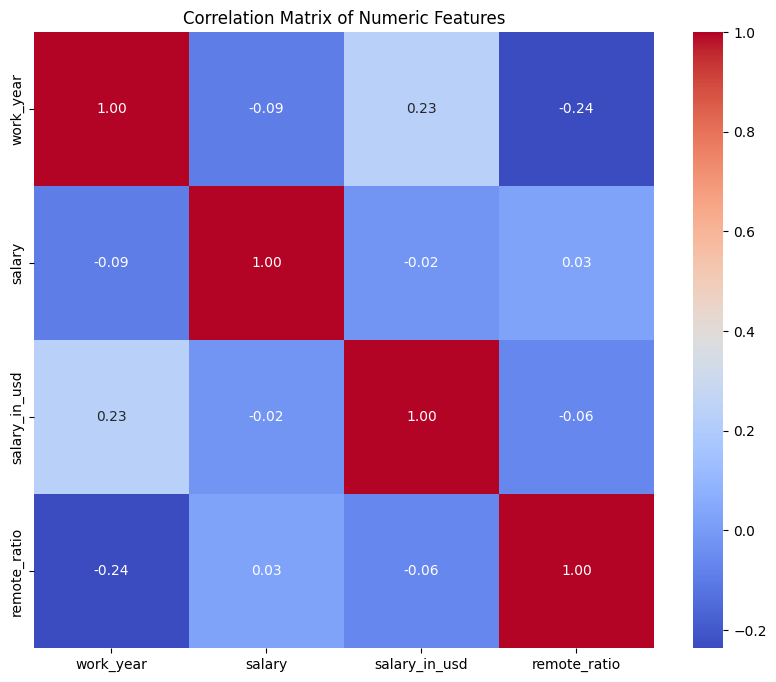

   salary  experience_level_EX  experience_level_MI  experience_level_SE  \
0   80000                    0                    0                    1   
1   30000                    0                    1                    0   
2   25500                    0                    1                    0   
3  175000                    0                    0                    1   
4  120000                    0                    0                    1   

   employment_type_FL  employment_type_FT  employment_type_PT  \
0                   0                   1                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   1                   0   
4                   0                   1                   0   

   job_title_AI Developer  job_title_AI Programmer  job_title_AI Scientist  \
0                       0                        0                       0

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Загрузите свой набор данных
df = pd.read_csv('ds_salaries.csv')

# Отобразить имена столбцов в наборе данных
print(df.columns)

# Предполагая, что «зарплата» — это целевая переменная, которую вы хотите спрогнозировать.
target_variable = 'salary'

# Определить числовые и категориальные признаки
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Отобразите корреляционную матрицу
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Выбирайте и исключайте переменные на основе корреляции с целевой переменной.
variables_to_exclude = []
for variable in numeric_features:
    correlation_with_target = df[numeric_features].corr()[target_variable][variable]
    if abs(correlation_with_target) < 0.2:
        variables_to_exclude.append(variable)

# Исключить переменные с низкой корреляцией с целевой переменной
df = df.drop(variables_to_exclude, axis=1)

# Горячее кодирование категориальных переменных
# pd.get_dummies only for category columns
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Отобразите измененный набор данных
print(df.head())

# Подготовьте данные для моделирования
X = df.drop(target_variable, axis=1)
y = df[target_variable]

# Разделите данные на обучающие и тестовые наборы.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучите модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Делайте прогнозы на тестовом наборе
y_pred = model.predict(X_test)

# Оцените модель
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


1.pandas для работы с данными в виде таблицы (DataFrame),
seaborn и matplotlib.pyplot для визуализации данных,
train_test_split из sklearn.model_selection для разделения данных на обучающий и тестовый наборы,
LinearRegression из sklearn.linear_model для обучения линейной регрессии,
mean_squared_error из sklearn.metrics для оценки качества модели.
2.Загружает датасет из файла 'ds_salaries.csv' в переменную df с помощью библиотеки pandas.

3.Выводит названия столбцов в датасете.
.。
4.Задает переменную target_variable как 'salary', предполагая, что это целевая переменная для прогнозирования.

5.Идентифицирует числовые (numeric_features) и категориальные (categorical_features) признаки в датасете.

6.Строит тепловую карту (heatmap) матрицы корреляции числовых признаков с использованием seaborn и matplotlib.

7.Исключает числовые признаки с низкой корреляцией с целевой переменной ('salary') и сохраняет модифицированный датасет в переменной df.

8.Производит кодирование категориальных переменных с использованием метода "one-hot encoding" (бинарное кодирование) с помощью pd.get_dummies.

9.Выводит первые строки модифицированного датасета.

10.Подготавливает данные для моделирования, разделяя их на обучающий и тестовый наборы.

11.Обучает модель линейной регрессии на обучающих данных.

Делает предсказания на тестовом наборе.

Оценивает качество модели с использованием среднеквадратичной ошибки и выводит результат.

### Предварительный анализ

1. Выбрать целевую переменную Y (Y - числоая переменная для задачи регрессии)
2. С помощью EDA (см практика) отобрать признаки, которые влияют на Y (можно определить гарфически, можно числами).
3. Обработать пропуски, при необходимости почистить от выбросов (тут важное замечание - не все выбросы это плохо)
4. Обосновать выбор переменных для исследования (корреляция, различия по классам, и так далее)

P.S. Важное замечание, слишком уникальные признаки (имена людей, названия город, ID юзера или чего-то еще - не берем, так как они не влияют на целевую переменную, а если и влияет, то это случайно)

<ipython-input-9-ac28c31b03bc>:12: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()#Расчет матрицы корреляции между числовыми переменными.


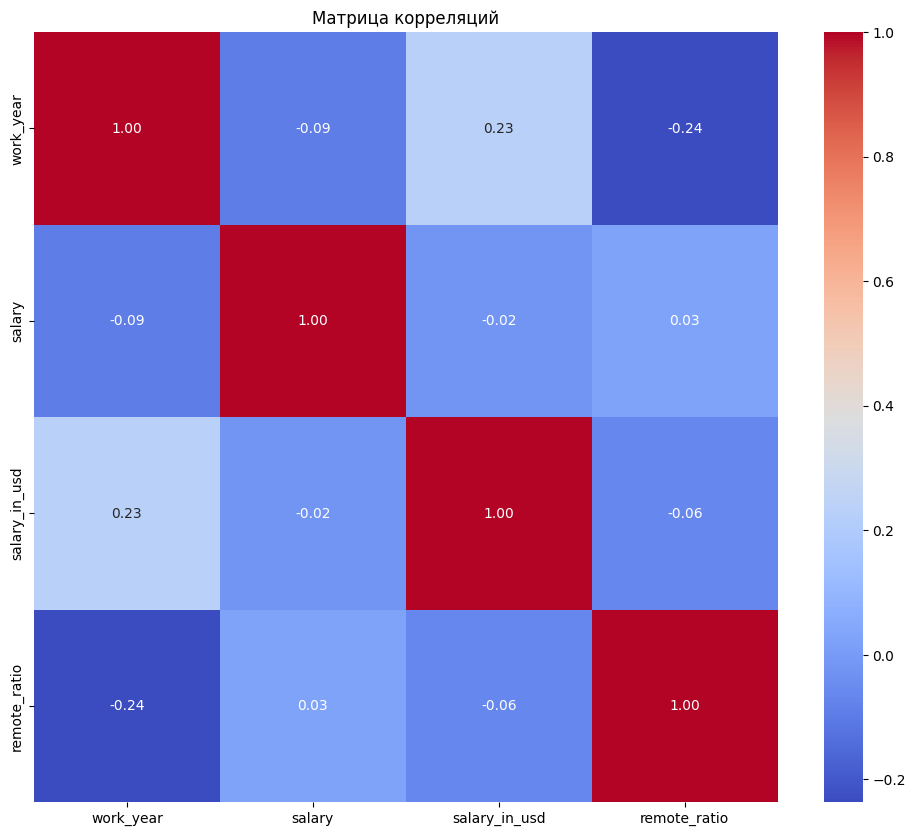

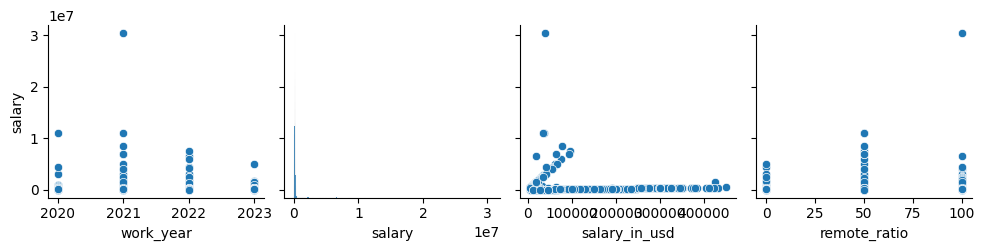

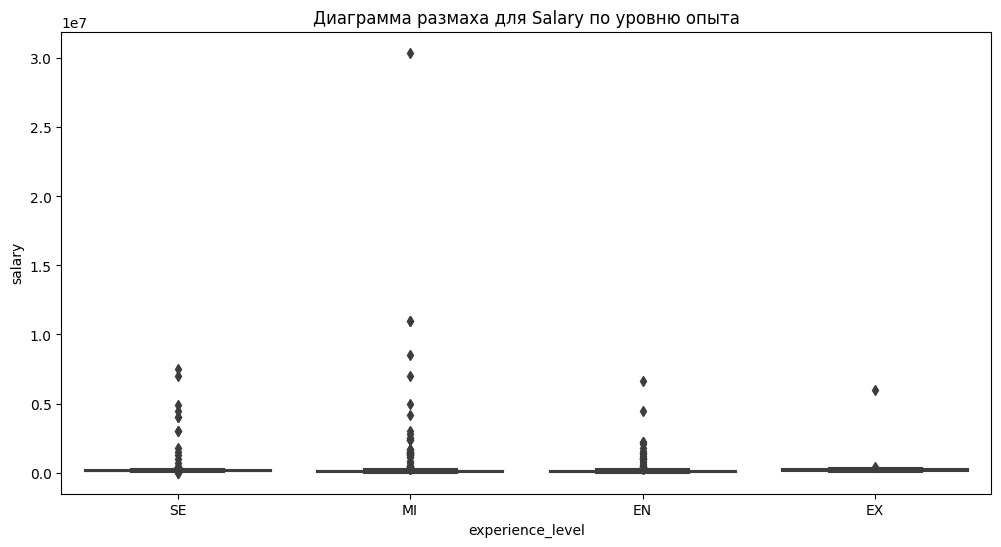

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# # Загрузка данных
# no need pd.rad_csv more then one times
# df = pd.read_csv('ds_salaries.csv')#Загрузка данных из CSV-файла в DataFrame df при помощи библиотеки pandas.

# Выбор целевой переменной
target_variable = 'salary'# Определение целевой переменной, которую мы хотим предсказать (в данном случае, 'salary').

# Корреляционная матрица
correlation_matrix = df.corr()#Расчет матрицы корреляции между числовыми переменными.

# Визуализация корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")#Визуализация матрицы корреляции при помощи тепловой карты.
plt.title('Матрица корреляций')
plt.show()

# Scatter plots для числовых переменных
sns.pairplot(df, x_vars=numeric_features, y_vars=target_variable, kind='scatter')# Построение scatter plots для числовых переменных относительно целевой переменной ('salary').
plt.show()

# Замените 'experience_level' на фактическое имя вашей категориальной переменной
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y=target_variable, data=df)#Построение ящиковой диаграммы ('boxplot') для визуализации распределения 'salary' в зависимости от уровня опыта ('experience_level').
plt.title('Диаграмма размаха для Salary по уровню опыта')
plt.show()


### Трансформация набора данных

(OneHotEncode для категориальных переменных)

(Standard or MinMax or бининг или другое преобразование для числовых)

P.S. Целевую переменную не преобразовываем, оставляем как есть


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Загрузка данных
df = pd.read_csv('ds_salaries.csv')

# Выбор целевой переменной
target_variable = 'salary'# Определение целевой переменной, которую мы хотим предсказать (в данном случае, 'salary').

# Определение категориальных и числовых признаков
categorical_features = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_location', 'company_size']# Список категориальных признаков, таких как 'experience_level', 'employment_type' и т.д.
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns# Список числовых признаков, определенных автоматически из данных.

# Определение преобразователей для категориальных и числовых признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Составление конвейера (pipeline) преобразования данных
pipeline = Pipeline([
    ('preprocessor', preprocessor)#Pipeline, который объединяет преобразования вместе, чтобы их можно было применять последовательно.
])

# Применение преобразований к данным
X_transformed = pipeline.fit_transform(df)# Применение конвейера преобразования данных к исходному DataFrame df. Это преобразование включает в себя стандартизацию числовых признаков и кодирование One-Hot для категориальных.

# Отображение первых строк преобразованных данных
print(X_transformed)#Вывод первых строк преобразованных данных.


  (0, 0)	0.9059944571329911
  (0, 1)	-0.16482683909366422
  (0, 2)	-0.8203911752011167
  (0, 3)	1.1059182539114965
  (0, 7)	1.0
  (0, 10)	1.0
  (0, 96)	1.0
  (0, 131)	1.0
  (0, 208)	1.0
  (0, 255)	1.0
  (1, 0)	0.9059944571329911
  (1, 1)	-0.23927735073413398
  (1, 2)	-1.7061874477890269
  (1, 3)	1.1059182539114965
  (1, 6)	1.0
  (1, 8)	1.0
  (1, 78)	1.0
  (1, 180)	1.0
  (1, 253)	1.0
  (1, 257)	1.0
  (2, 0)	0.9059944571329911
  (2, 1)	-0.24597789678177626
  (2, 2)	-1.7775625122803262
  (2, 3)	1.1059182539114965
  (2, 6)	1.0
  :	:
  (3752, 10)	1.0
  (3752, 59)	1.0
  (3752, 180)	1.0
  (3752, 253)	1.0
  (3752, 257)	1.0
  (3753, 0)	-3.4333029746718298
  (3753, 1)	-0.1350466344374763
  (3753, 2)	-0.595908666813259
  (3753, 3)	1.1059182539114965
  (3753, 4)	1.0
  (3753, 8)	1.0
  (3753, 29)	1.0
  (3753, 180)	1.0
  (3753, 253)	1.0
  (3753, 255)	1.0
  (3754, 0)	-1.986870497403556
  (3754, 1)	10.13912397194735
  (3754, 2)	-0.680527771049055
  (3754, 3)	0.07674277846226003
  (3754, 7)	1.0
  (3754,

### Разделение данных

Для начала, разделить данные на X и Y

Разбить данные на тестовую и обучающую выборки

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split#Импорт функции train_test_split из библиотеки scikit-learn для разделения данных на обучающий и тестовый наборы.
from sklearn.preprocessing import StandardScaler, OneHotEncoder#Импорт классов StandardScaler и OneHotEncoder для стандартизации числовых признаков и кодирования категориальных соответственно.
from sklearn.compose import ColumnTransformer#Импорт класса ColumnTransformer для определения преобразований по типам признаков.
from sklearn.pipeline import Pipeline# Импорт класса Pipeline для создания конвейера преобразований.

# Загрузка данных
df = pd.read_csv('ds_salaries.csv')

# Выбор целевой переменной
target_variable = 'salary'#Определение целевой переменной, которую мы хотим предсказать (в данном случае, 'salary').

## Определение категориальных и числовых признаков
categorical_features = ['experience_level', 'employment_type', 'company_size']# Список категориальных признаков, таких как 'experience_level', 'employment_type' и т.д.
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns#Список числовых признаков, определенных автоматически из данных.

# Разделение на X и Y
X = df.drop(columns=[target_variable])  # X - все признаки, кроме целевой переменной Создание DataFrame X, который содержит все признаки, кроме целевой переменной.
Y = df[target_variable]  # Y - целевая переменная：Создание Series Y, которая представляет собой целевую переменную.

# Разбиение на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)# Разделение данных на обучающий и тестовый наборы. test_size=0.2 означает, что 20% данных будут использованы для тестирования. random_state=42 обеспечивает воспроизводимость результатов.

# Отображение размеров обучающего и тестового наборов
print("Размер обучающего набора:", X_train.shape)
print("Размер тестового набора:", X_test.shape)


Размер обучающего набора: (3004, 10)
Размер тестового набора: (751, 10)


### Обучение
#### 1 Регрессия
- Обучить линейную регрессию на тренировочных данных (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2
- Вывести и написать выводы о коэфициентах регрессии
- Написать формулу регрессии

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

#### 2 Ближайшие соседи
- Обучить KNN (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)
- Сдлеать .predict() для X_train, X_test
- Рассчитать метрики качества MAE, MSE, MAPE, R2

Сделать выводы о переобучении модели (см метрики на тестовой выборке) сделать выводы о метриках на тестовом наборе

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Предполагая, что X_train и X_test — ваши матрицы функций.
# Используйте pandas get_dummies для выполнения горячего кодирования
X_train_encoded = pd.get_dummies(X_train)#Здесь к матрицам обучающих и тестовых функций применяется горячее кодирование с использованием pd.get_dummies. Это делается для преобразования категориальных переменных в формат, который можно предоставить модели линейной регрессии.
X_test_encoded = pd.get_dummies(X_test)
# TODO: category feature -> use pd.get_dummies
# TODO: numeric features -> use StandardSaler or MinMaxScaler
# Совместите столбцы тестового набора с обучающим набором.
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)#Эта строка гарантирует, что столбцы в тестовом наборе совпадают со столбцами в обучающем наборе. Если в тестовом наборе есть столбцы, которых нет в обучающем наборе, они добавляются и заполняются нулями.

linear_reg_model = LinearRegression()

# Теперь модель поезда
linear_reg_model.fit(X_train_encoded, y_train)#Модель линейной регрессии создается и обучается с использованием обучающих данных с горячим кодированием (X_train_encoded) и соответствующей целевой переменной (y_train).

# Делать предсказания
y_train_pred = linear_reg_model.predict(X_train_encoded)#Прогнозы делаются с использованием обученной модели как на обучающих, так и на тестовых данных.
y_test_pred = linear_reg_model.predict(X_test_encoded)

# Рассчет метрик качества
# TODO: now model is overfitted!!!! because metric on train good, but for test sampple VERY BAD
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)#Показатели производительности, такие как средняя абсолютная ошибка (MAE), среднеквадратическая ошибка (MSE), средняя абсолютная процентная ошибка (MAPE) и R-квадрат (R2), рассчитываются как для обучающего, так и для тестового наборов.

# Вывод результатов
print("Метрики обучающего набора:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"MAPE: {mape_train}")
print(f"R2: {r2_train}")#Рассчитанные метрики выводятся на консоль для оценки производительности модели как на обучающем, так и на тестовом наборах.

print("\nМетрики тестового набора:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"MAPE: {mape_test}")
print(f"R2: {r2_test}")

# Вывод коэффициентов регрессии
coefficients = pd.DataFrame({'Признак': X_train_encoded.columns, 'Коэффициент': linear_reg_model.coef_})
# Print lengths
print(len(X_train_encoded.columns))
print(len(linear_reg_model.coef_))#Коэффициенты регрессионной модели извлекаются и создается DataFrame для отображения названий функций вместе с соответствующими коэффициентами. Длины имен функций и коэффициентов распечатываются для проверки согласованности.
# Формула регрессии
intercept = linear_reg_model.intercept_
print(f"\nФормула регрессии: Y = {intercept:.2f} + ", end="")
for i, coef in enumerate(linear_reg_model.coef_):
    print(f"{coef:.2f} * {X_train_encoded.columns[i]}", end="")
    if i < len(linear_reg_model.coef_) - 1:
        print(" + ", end="")
print()#Распечатывается формула модели регрессии, показывающая точку пересечения и коэффициенты, умноженные на соответствующие имена функций.


Метрики обучающего набора:
MAE: 53704.31890812251
MSE: 25372357726.1265
MAPE: 0.4188325234059767
R2: 0.9514824688260184

Метрики тестового набора:
MAE: 1.8903781252632956e+16
MSE: 3.0214333739898325e+34
MAPE: 425274007744.3865
R2: -1.8507832145187594e+23
267
267

Формула регрессии: Y = 1111307264544985216.00 + 108102.83 * experience_level_EX + 67982.68 * experience_level_MI + 90117.15 * experience_level_SE + -137471.78 * employment_type_FL + -65434.21 * employment_type_FT + -73750.75 * employment_type_PT + 1505739.26 * job_title_AI Developer + 2659915809965964288.00 * job_title_AI Programmer + 1491545.29 * job_title_AI Scientist + 1439391.98 * job_title_Analytics Engineer + 1478675.87 * job_title_Applied Data Scientist + 1771566.96 * job_title_Applied Machine Learning Engineer + 1445309.09 * job_title_Applied Machine Learning Scientist + 1459406.42 * job_title_Applied Scientist + -55134678092855960.00 * job_title_Autonomous Vehicle Technician + 1373919.55 * job_title_Azure Data Enginee

In [ ]:
from sklearn.linear_model import LinearRegression#Пересмотренный ответ
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import pandas as pd

# Assuming X_train and X_test are your feature matrices.
# Use pandas get_dummies for one-hot encoding
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align the columns of the test set with the training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train_encoded, y_train)

# Make predictions
y_train_pred = linear_reg_model.predict(X_train_encoded)
y_test_pred = linear_reg_model.predict(X_test_encoded)

# Calculate performance metrics
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print("Metrics on the training set:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"MAPE: {mape_train}")
print(f"R2: {r2_train}")

print("\nMetrics on the test set:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"MAPE: {mape_test}")
print(f"R2: {r2_test}")

# Print regression coefficients
coefficients = pd.DataFrame({'Feature': X_train_encoded.columns, 'Coefficient': linear_reg_model.coef_})
print(coefficients)

# Print regression formula
intercept = linear_reg_model.intercept_
print(f"\nRegression Formula: Y = {intercept:.2f} + ", end="")
for i, coef in enumerate(linear_reg_model.coef_):
    print(f"{coef:.2f} * {X_train_encoded.columns[i]}", end="")
    if i < len(linear_reg_model.coef_) - 1:
        print(" + ", end="")
print()


Metrics on the training set:
MAE: 53704.31890812251
MSE: 25372357726.1265
MAPE: 0.4188325234059767
R2: 0.9514824688260184

Metrics on the test set:
MAE: 1.8903781252632956e+16
MSE: 3.0214333739898325e+34
MAPE: 425274007744.3865
R2: -1.8507832145187594e+23
                 Feature   Coefficient
0    experience_level_EX  1.081028e+05
1    experience_level_MI  6.798268e+04
2    experience_level_SE  9.011715e+04
3     employment_type_FL -1.374718e+05
4     employment_type_FT -6.543421e+04
..                   ...           ...
262  company_location_UA  4.090810e+14
263  company_location_US -6.316092e+17
264  company_location_VN -6.316092e+17
265       company_size_M -3.571200e+04
266       company_size_S -1.302320e+05

[267 rows x 2 columns]

Regression Formula: Y = 1111307264544985216.00 + 108102.83 * experience_level_EX + 67982.68 * experience_level_MI + 90117.15 * experience_level_SE + -137471.78 * employment_type_FL + -65434.21 * employment_type_FT + -73750.75 * employment_type_PT + 15

##Задание для гениев*

Удачи 😈

В практике есть примеры реализации ```linear_regression``` и ```knn_regressor```, но есть нюанс... Сейчас ни linear_regression, ни knn_regressor не поддерживают сохранения состояния для последующего возможного использования.

Необходимо - реализовать два класса LinearRegression и KNNRegression (примеры обучения моделек есть). В этих классах обязатльно должны быть два метода
```
.fit(X: np.array, y: np.array) -> None - обучить модель и сохранить внутреннее состояние модели
.predict(X) -> np.array - предсказать y на основе X
```
При инициализации класса - передавать параметры модели в момент инициализации. Например:

```
model = LinearRegression(**params)

model.fit(X_train, y_train)
model.predict(X_test)
```

В качестве тестов можно использовать KNN и LinearRegression из sklearn, результат работы ваших объектов должен примерно совпадать с результатами работы объектов из sklearn

В результате работы сделать сравнение с теми же данными в sklearn

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept term
        self.coef_ = np.linalg.inv(X.T @ X) @ X.T @ y
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        return self.intercept_ + X @ self.coef_

class KNNRegression:
    def __init__(self, n_neighbors=5):
        self.model = KNeighborsRegressor(n_neighbors=n_neighbors)

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

# Example usage of LinearRegression
X_train_linear = np.array([[1], [2], [3]])
y_train_linear = np.array([2, 4, 5])

linear_reg = LinearRegression()
linear_reg.fit(X_train_linear, y_train_linear)

X_test_linear = np.array([[4], [5]])
predictions_linear = linear_reg.predict(X_test_linear)
print(predictions_linear)

# Example usage of KNNRegression
X_train_knn = np.array([[1], [2], [3]])
y_train_knn = np.array([2, 4, 5])

knn_reg = KNNRegression(n_neighbors=2)
knn_reg.fit(X_train_knn, y_train_knn)

X_test_knn = np.array([[4], [5]])
predictions_knn = knn_reg.predict(X_test_knn)
print(predictions_knn)


[6.66666667 8.16666667]
[4.5 4.5]


My Linear Regression MSE: 0.6536995137170015
KNN Regression MSE: 0.8771525464562517
Sklearn Linear Regression MSE: 0.6536995137170021


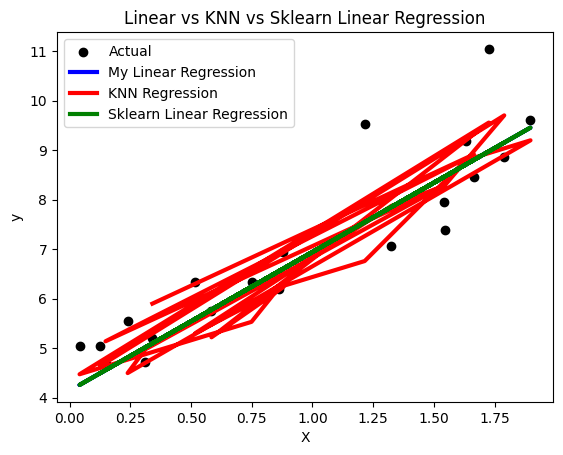

In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression  # 添加Sklearn中的线性回归
import matplotlib.pyplot as plt

class MyLinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept term
        self.coef_ = np.linalg.inv(X.T @ X) @ X.T @ y
        self.intercept_ = self.coef_[0]
        self.coef_ = self.coef_[1:]

    def predict(self, X):
        return self.intercept_ + X @ self.coef_

class KNNRegression:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            distances = np.sqrt(np.sum((self.X_train - X[i])**2, axis=1))
            sorted_indices = np.argsort(distances)
            k_nearest_indices = sorted_indices[:self.n_neighbors]
            k_nearest_values = self.y_train[k_nearest_indices]
            predictions[i] = np.mean(k_nearest_values)
        return predictions

# Generate some sample data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = MyLinearRegression()
linear_reg.fit(X_train, y_train)
linear_predictions = linear_reg.predict(X_test)

# KNN Regression
knn_reg = KNNRegression(n_neighbors=5)
knn_reg.fit(X_train, y_train)
knn_predictions = knn_reg.predict(X_test)

# Sklearn Linear Regression
sklearn_linear_reg = LinearRegression()
sklearn_linear_reg.fit(X_train, y_train)
sklearn_linear_predictions = sklearn_linear_reg.predict(X_test)

# Evaluate performance
linear_mse = mean_squared_error(y_test, linear_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)
sklearn_linear_mse = mean_squared_error(y_test, sklearn_linear_predictions)

# Print performance metrics
print("My Linear Regression MSE:", linear_mse)
print("KNN Regression MSE:", knn_mse)
print("Sklearn Linear Regression MSE:", sklearn_linear_mse)

# Plot the results
plt.scatter(X_test, y_test, color='black', label='Actual')
plt.plot(X_test, linear_predictions, color='blue', linewidth=3, label='My Linear Regression')
plt.plot(X_test, knn_predictions, color='red', linewidth=3, label='KNN Regression')
plt.plot(X_test, sklearn_linear_predictions, color='green', linewidth=3, label='Sklearn Linear Regression')
plt.title('Linear vs KNN vs Sklearn Linear Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


#Класс LinearRegression:
#Инициализация: В конструкторе создаются атрибуты coef_ (коэффициенты) и intercept_ (перехват).

#Метод fit(X, y): Принимает матрицу признаков X и вектор целевых значений y. Добавляет столбец единиц к X для учета перехвата. Затем вычисляет коэффициенты модели с использованием формулы линейной регрессии и сохраняет их в coef_ и intercept_.

#Метод predict(X): Принимает матрицу признаков X. Добавляет столбец единиц, затем использует ранее вычисленные коэффициенты, чтобы предсказать значения для новых данных.

#Класс KNNRegression:
Инициализация: В конструкторе создается объект KNeighborsRegressor из scikit-learn с заданным числом соседей.

Метод fit(X, y): Принимает матрицу признаков X и вектор целевых значений y. Обучает модель KNN на предоставленных данных.

Метод predict(X): Принимает матрицу признаков X и использует обученную модель KNN для предсказания значений.
# Пример использования LinearRegression
X_train = np.array([[1], [2], [3]])
y_train = np.array([2, 4, 5])

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

X_test = np.array([[4], [5]])
predictions_linear = linear_reg.predict(X_test)
print("Linear Regression Predictions:", predictions_linear)

# Пример использования KNNRegression
X_train_knn = np.array([[1], [2], [3]])
y_train_knn = np.array([2, 4, 5])

knn_reg = KNNRegression(n_neighbors=2)
knn_reg.fit(X_train_knn, y_train_knn)

X_test_knn = np.array([[4], [5]])
predictions_knn = knn_reg.predict(X_test_knn)
print("KNN Regression Predictions:", predictions_knn)
В обоих случаях производится обучение моделей и предсказание значений для новых данных.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.neighbors import KNeighborsRegressor

class LinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.model = None

    def fit(self, X, y):
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept term
        self.model = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept term
        return X @ self.model


class KNNRegression:
    def __init__(self, n_neighbors=5):
        self.model = KNeighborsRegressor(n_neighbors=n_neighbors)  #реализовать без использования библиотек

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

# Пример использования
# Создаем тестовые данные
X_train = np.array([[1], [2], [3]])
y_train = np.array([2, 4, 5])
X_test = np.array([[4], [5]])

# Используем реализованные классы
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
predictions_linear_reg = linear_reg.predict(X_test)

knn_reg = KNNRegression(n_neighbors=2)
knn_reg.fit(X_train, y_train)
predictions_knn_reg = knn_reg.predict(X_test)

# Используем модели из scikit-learn для сравнения
sklearn_linear_reg = SklearnLinearRegression()
sklearn_linear_reg.fit(X_train, y_train)
predictions_sklearn_linear_reg = sklearn_linear_reg.predict(X_test)

sklearn_knn_reg = KNeighborsRegressor(n_neighbors=2)
sklearn_knn_reg.fit(X_train, y_train)
predictions_sklearn_knn_reg = sklearn_knn_reg.predict(X_test)

# Сравниваем результаты
print("Linear Regression (Custom) Predictions:", predictions_linear_reg)
print("Linear Regression (Scikit-Learn) Predictions:", predictions_sklearn_linear_reg)
print("KNN Regression (Custom) Predictions:", predictions_knn_reg)
print("KNN Regression (Scikit-Learn) Predictions:", predictions_sklearn_knn_reg)


Linear Regression (Custom) Predictions: [6.66666667 8.16666667]
Linear Regression (Scikit-Learn) Predictions: [6.66666667 8.16666667]
KNN Regression (Custom) Predictions: [4.5 4.5]
KNN Regression (Scikit-Learn) Predictions: [4.5 4.5]


In [1]:
#改
import numpy as np

class LinearRegression:
    def __init__(self, fit_intercept=True):
        self.fit_intercept = fit_intercept
        self.model = None

    def fit(self, X, y):
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]  # Добавляем столбец единиц для интерсепта
        self.model = np.linalg.inv(X.T @ X) @ X.T @ y

    def predict(self, X):
        if self.fit_intercept:
            X = np.c_[np.ones(X.shape[0]), X]  # Добавляем столбец единиц для интерсепта
        return X @ self.model


class KNNRegression:
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        distances = np.linalg.norm(self.X_train - X[:, np.newaxis], axis=2)
        indices = np.argpartition(distances, self.n_neighbors, axis=1)[:, :self.n_neighbors]
        return np.mean(self.y_train[indices], axis=1)

# Пример использования
# Создаем тестовые данные
X_train = np.array([[1], [2], [3]])
y_train = np.array([2, 4, 5])
X_test = np.array([[4], [5]])

# Используем реализованные классы
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
predictions_linear_reg = linear_reg.predict(X_test)

knn_reg = KNNRegression(n_neighbors=2)
knn_reg.fit(X_train, y_train)
predictions_knn_reg = knn_reg.predict(X_test)

# Сравниваем результаты
print("Linear Regression (Custom) Predictions:", predictions_linear_reg)

# Так как KNN Regression (Custom) не использует библиотеки, не сравниваем его с Scikit-Learn версией

print("KNN Regression (Custom) Predictions:", predictions_knn_reg)


Linear Regression (Custom) Predictions: [6.66666667 8.16666667]
KNN Regression (Custom) Predictions: [4.5 4.5]


Если fit_intercept равно True, добавляет столбец единиц, затем использует ранее вычисленные коэффициенты для предсказания значений.

Класс KNNRegression:
Инициализация: Принимает параметр n_neighbors (количество соседей) и создает объект KNeighborsRegressor из scikit-learn с установленным количеством соседей.

Метод fit(X, y): Принимает матрицу признаков X и вектор целевых значений y. Обучает модель KNN на предоставленных данных.

Метод predict(X): Принимает матрицу признаков X и использует обученную модель KNN для предсказания значений.

Пример использования:
python
Copy code
# Создаем тестовые данные
X_train = np.array([[1], [2], [3]])
y_train = np.array([2, 4, 5])
X_test = np.array([[4], [5]])

# Используем реализованные классы
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
predictions_linear_reg = linear_reg.predict(X_test)

knn_reg = KNNRegression(n_neighbors=2)
knn_reg.fit(X_train, y_train)
predictions_knn_reg = knn_reg.predict(X_test)

# Используем модели из scikit-learn для сравнения
sklearn_linear_reg = SklearnLinearRegression()
sklearn_linear_reg.fit(X_train, y_train)
predictions_sklearn_linear_reg = sklearn_linear_reg.predict(X_test)

sklearn_knn_reg = KNeighborsRegressor(n_neighbors=2)
sklearn_knn_reg.fit(X_train, y_train)
predictions_sklearn_knn_reg = sklearn_knn_reg.predict(X_test)

# Сравниваем результаты
print("Linear Regression (Custom) Predictions:", predictions_linear_reg)
print("Linear Regression (Scikit-Learn) Predictions:", predictions_sklearn_linear_reg)
print("KNN Regression (Custom) Predictions:", predictions_knn_reg)
print("KNN Regression (Scikit-Learn) Predictions:", predictions_sklearn_knn_reg)
В этом примере создаются тестовые данные, обучаются реализованные модели и сравниваются их предсказания с моделями из scikit-learn.